In [68]:
import numpy as np
from numpy.linalg import inv
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random.default_rng(123)

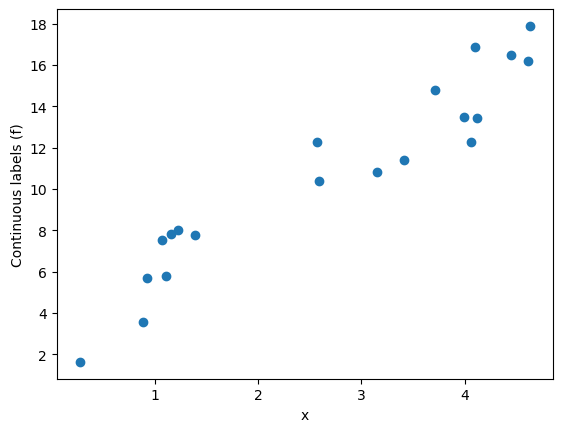

In [69]:
x = 5 * rng.random(20)
f = 3 * x + 5 * rng.random(20)
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)');

In [70]:
X = np.array([np.ones(len(x)), x]).T
a = inv(X.T @ X) @ X.T @ f          # Create the "model"

In [71]:
x_predict = np.linspace(0, 5, num=100)
f_predict = a[0] + a[1] * x_predict         # "Predict" using the model

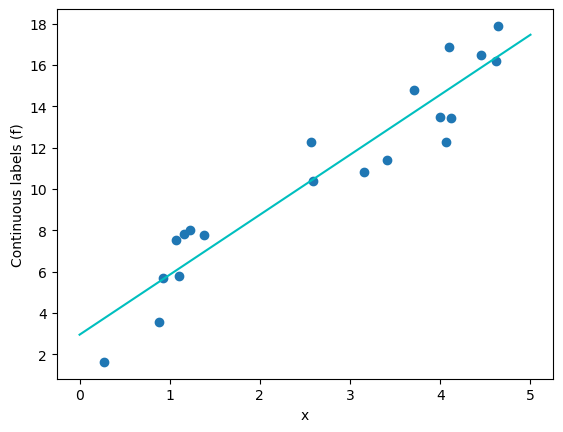

In [72]:
plt.scatter(x, f)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(x_predict, f_predict, 'c');

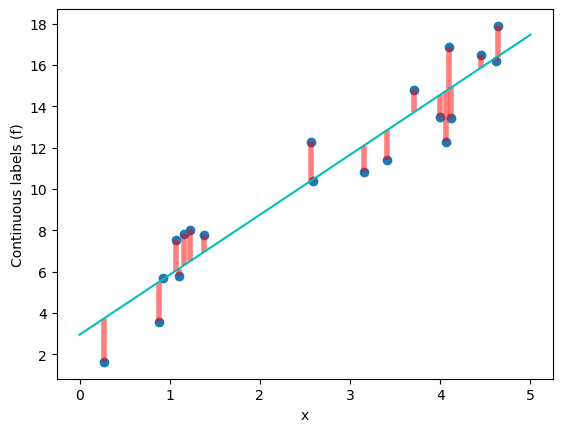

In [73]:
from matplotlib.collections import LineCollection
fp = X @ a
plt.scatter(x, f)
lc = LineCollection([[(x[i], f[i]), (x[i], fp[i])] for i in range(len(x))], color='r', linewidth=4,alpha=0.5)
plt.gca().add_collection(lc)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(x_predict, f_predict, 'c');

In [74]:
linear_example = {'data': [x, f], 'model': a}

In [75]:
x1 = 5 * rng.random(100)
x2 = 5 * rng.random(100)
f = 10 - (3*x1 + 2* x2 + 2 * rng.random(100))

In [76]:
X = np.array([np.ones(len(x1)), x1, x2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f

C:\Users\Rajarshi\AppData\Local\Temp\ipykernel_2528\134741332.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca( projection='3d')


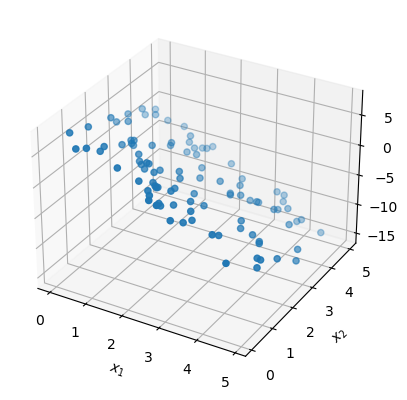

In [77]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure().gca( projection='3d')
ax.scatter(x1, x2, f)
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$');

C:\Users\Rajarshi\AppData\Local\Temp\ipykernel_2528\3509126272.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca( projection='3d')


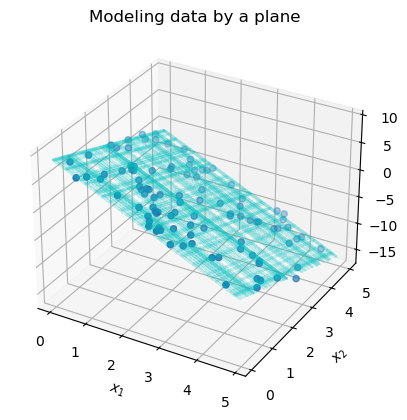

In [78]:
ax = plt.figure().gca( projection='3d')
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
xx1, xx2 = np.meshgrid(x1, x2)
zz = a[0] + a[1] * xx1 + a[2] * xx2
ax.plot_wireframe(xx1, xx2, zz, color='c', alpha=0.2)
ax.scatter(x1, x2, f); ax.set_title('Modeling data by a plane');

In [79]:
planar_example = {'data': [np.array([x1, x2]).T, f], 'model': a}

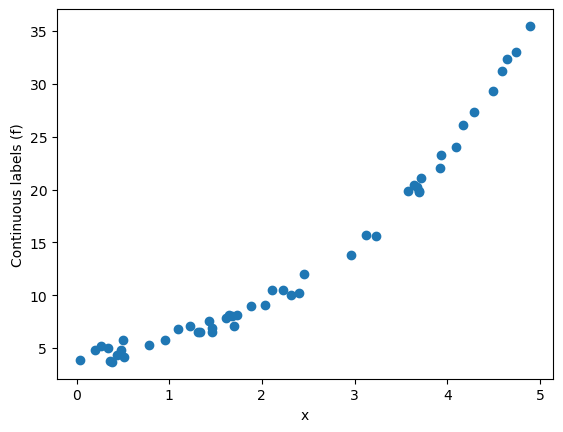

In [80]:
x = 5 * rng.random(50)
f = 3 * np.exp(x/2) + 2 * rng.random(50)
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)');

In [81]:
phi0 = np.ones(len(x))
phi1 = x
phi2 = x**2

X = np.array([phi0, phi1, phi2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f

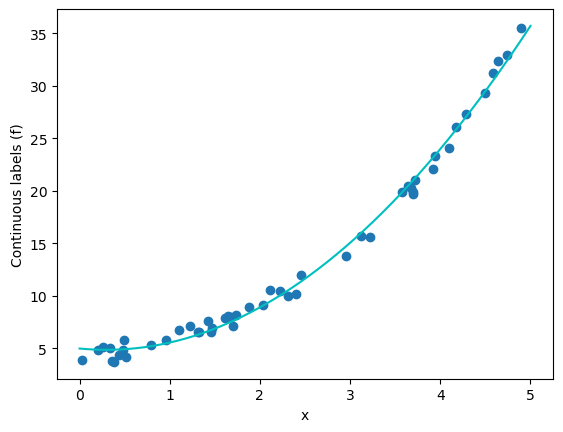

In [82]:
xcurve_predict = np.linspace(0, 5, num=500)
phi0 = np.ones(len(xcurve_predict))
phi1 = xcurve_predict
phi2 = xcurve_predict**2

fcurve_predict = a[0] * phi0 + a[1] * phi1 + a[2] * phi2
plt.scatter(x, f)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(xcurve_predict, fcurve_predict, 'c');

In [83]:
curve_example = {'data': [x, f], 'model': a, 'type': 'quadratic'}

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [85]:
x, f = linear_example['data']       # Recall the saved data from the first example
model.fit(x[:, np.newaxis], f)      # Training step

LinearRegression()

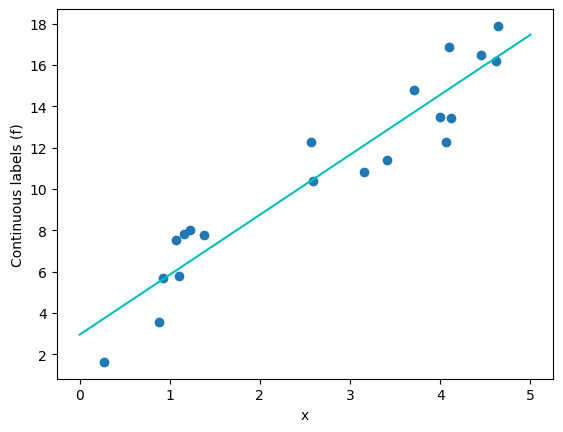

In [86]:
xfit = np.linspace(0, 5, num=100)
ffit = model.predict(xfit[:, np.newaxis])       # Prediction step
plt.scatter(x, f);
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(xfit, ffit, 'c');

In [87]:
model.intercept_, model.coef_

(2.9548137487468358, array([2.90310325]))

In [88]:
linear_example['model']

array([2.95481375, 2.90310325])

In [89]:
x12, f = planar_example['data']
model.fit(x12, f)

LinearRegression()

In [90]:
model.intercept_, model.coef_

(9.167204926561409, array([-3.03592026, -2.03048875]))

In [91]:
planar_example['model']

array([ 9.16720493, -3.03592026, -2.03048875])

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [93]:
q = PolynomialFeatures(3, include_bias=False)

In [94]:
data = np.array([5, 7, 9])[:, np.newaxis]
q.fit_transform(data)

array([[  5.,  25., 125.],
       [  7.,  49., 343.],
       [  9.,  81., 729.]])

In [95]:
x, y = curve_example['data'] # load data from the prior example

# make model/pipeline and fit the data to it:
quadratic_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

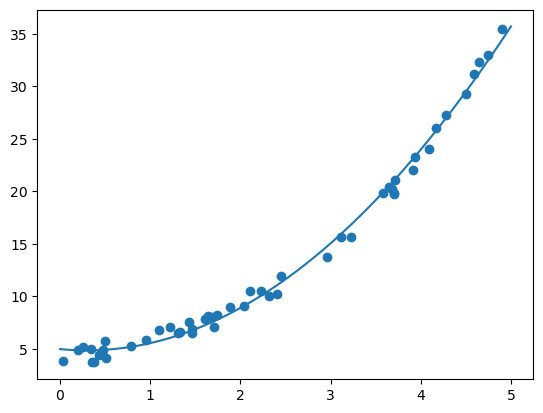

In [96]:
yfit = quadratic_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [97]:
quadratic_model.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression()}

In [98]:
quadratic_model.named_steps['linearregression'].intercept_

4.963796378670276

In [99]:
quadratic_model.named_steps['linearregression'].coef_

array([ 0.        , -0.82755299,  1.39570211])

In [100]:
curve_example['model']      # previously saved results from first principles

array([ 4.96379638, -0.82755299,  1.39570211])